# Homework 2

## Introduction

### Important dates

* Homework release: Thursday, 7th November 2019
* **Homework due: Wednesday, 20th November 2019 (23:59 hours, 11:59 PM)**
* **Peer review due: Wednesday, 27th November 2019 (23:59 hours, 11:59 PM)**
* Grading release: Monday, 9th December 2019

**Some rules:**
* You are allowed to use any built-in Python library that comes with Anaconda. You should make heavy use of `sklearn`, which will save you from (re)implementing any of the classical machine learning algorithms yourself. If you want to use an external library, you have to justify your choice.
* Make sure you use the data folder provided in the repository in read-only mode.
* Be sure to provide textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
* Back up any hypotheses and claims with data, since this is an important aspect of the course.
* Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.
* Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
* **Important Note:** Owing to the scale of the datasets some tasks might take longer to finish, and hence, it is *recommended* that you start working on this homework as early as possible.

# Task A: Applied ML and Reading the Stats

## Description

You have been appointed as the manager/head-coach of Lausanne's men's football team [FC Lausanne-Sport](https://en.wikipedia.org/wiki/FC_Lausanne-Sport), and as a first step towards improving the team you decide to hire a new player. One way to assess the quality of a player would be to watch the games in which he participates. Since there are 22 players on the field, he will typically only have the ball for around 5-10 minutes per game. In addition, the ADA homework takes up all your free time, and hence, you need a more efficient and elegant solution.

You hypothesize that perhaps looking at the *physical capabilities* of the candidates such as *'running'* and *'jumping'* might be a good enough proxy for their skill as a football player. Thus, you come up with the idea of letting candidate players do just a couple of exercises such as *'100m sprint'* and *'high jump'*, and decide on one of the candidates based on his performance in these exercises. Because you are an aspiring data scientist, you want to use machine learning to optimize the player selection.

You come across a dataset of players from the football video game [FIFA 19](https://www.ea.com/games/fifa/fifa-19), which contains hand-annotated data about thousands of real-world football players, in particular about their skills in different domains.
Each row of the dataset corresponds to a player (you might recognize some of them). It contains information such as the player's nationality and their market value. However, the attributes that we are interested in are the skills of the players in various footballing aspects such as *'agility'*, *'dribbling'*, or *'heading accuracy'*. Apart from one attribute (see **A2.1.**), all of them are *non-negative* values in different bounded ranges, where a *higher value* corresponds to the *player being better* in that skill.

### A1. Getting a sense of the data

#### A1.1.
Load the data present at `data/fifa19_players.csv` into a Pandas DataFrame.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

%matplotlib inline

import seaborn as sb
sb.set_context("notebook")
sb.set()

In [3]:
players = pd.read_csv('data/fifa19_players.csv')
players.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### A1.2.
The column *'Overall'* contains a score representing the overall performance of a football player. Before you start, you want to make sure that there is enough diversity in the dataset to draw meaningful conclusions (e.g. it shouldn't be the case that all players come roughly from the same skill class).
* First, think about what kind of distribution you would expect for the overall scores.
* Moving ahead, plot a histogram of the scores with *30 equal-width bins* and analyze the plot. Is this the distribution that you had expected?

We expect a normal distribution which is spread between 50 and 100 because fifa will almost never give a overall score less than 50 (it is not plesant for the player) or above 100 (which is the maximum).

Because the overall score reflect the level of a player we expect a small number of player being very good (big overall score) and a small number of very bad player (they are all professionals, small overall score). Then we expect a large number of player having an overall score close to the average.

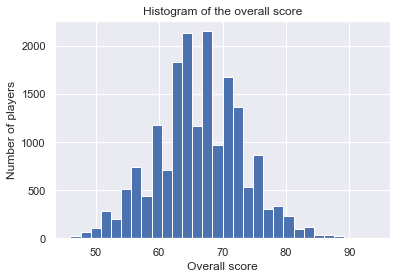

In [4]:
plt.figure()
players.Overall.hist(bins=30)
plt.xlabel("Overall score")
plt.ylabel("Number of players")
plt.title("Histogram of the overall score")
plt.show()

We can guess that it is a normal distribution but there are a lot of gaps in the histogram which does not correspond to a normal distribution.

#### A1.3.
If you observe differences from what you expected in **A1.2.**, they might be due to a misrepresentation by the plot. Carefully study the actual values in the *'Overall'* column and **fix** the histogram accordingly! Redo the plot of step A1.2., and briefly state your observations.

In [5]:
# get the unique value of the score
players.Overall.unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46],
      dtype=int64)

We can see that the Overall score takes only integer value. Then we need to represent the histogram using as many bins as the number of different possible values (so that each bins correspond to a particular value)

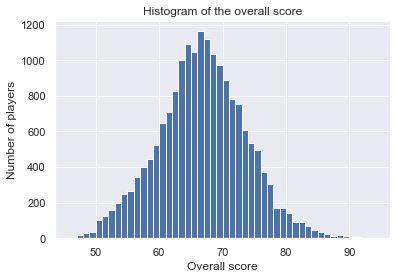

In [6]:
plt.figure()
players.Overall.hist(bins=len(players.Overall.unique()))
plt.xlabel("Overall score")
plt.ylabel("Number of players")
plt.title("Histogram of the overall score")
plt.show()

Now we can see that it looks much more like a normal distribution because all the gaps are gone.

### A2. Preprocessing

The features that you will use for the remainder of the tasks are the following; you can safely discard the rest of the columns.

In [8]:
skills = ['Overall', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
# Keep only skills features
players = players[skills]
players.head()

,Overall,Weak Foot,Skill Moves,Work Rate,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,94,4.0,4.0,Medium/ Medium,84.0,95.0,70.0,90.0,86.0,97.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94,4.0,5.0,High/ Low,84.0,94.0,89.0,81.0,87.0,88.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,92,5.0,5.0,High/ Medium,79.0,87.0,62.0,84.0,84.0,96.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,91,3.0,1.0,Medium/ Medium,17.0,13.0,21.0,50.0,13.0,18.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,91,5.0,4.0,High/ High,93.0,82.0,55.0,92.0,82.0,86.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


#### A2.1.
Since your final goal will be to train a *linear machine learning model*, all of the features you use need to be *numerical*. 'Work Rate' refers to how much effort a player puts into his play when attacking and defending, respectively, but it is non-numeric and non-atomic. Transform the feature into _two_ numerical features.

In [9]:
# Split the column work rate into 2 columns
players[['Attack Effort', 'Defense Effort']] = players['Work Rate'].str.split('/', expand=True)
# for each of these 2 feature there are 3 level
# we convert them into category and get the codes
#we assume the first work rate is the attack effort and the second one is the defense effort
players['Attack Effort'] = players['Attack Effort'].astype('category').cat.codes
players['Defense Effort'] = players['Defense Effort'].astype('category').cat.codes
# Drop the Work rate column
players = players.drop(columns=['Work Rate'])
players.head()

,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Attack Effort,Defense Effort
0,94,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2
1,94,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,0,1
2,92,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,0,2
3,91,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,2,2
4,91,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,0,0


#### A2.2.
As it is true for any real-world dataset out there, you might encounter *missing values*. There are numerous ways to *impute* them (fill them up) by looking at records for which these values are not missing.
* Use a *simple aggregation* of the records for which the values are present (not missing) to fill in the missing values.
* Briefly *justify* the choice of your *aggregation scheme*.

In [10]:
# Display the column with missing values
players.isnull().sum()[players.isnull().sum() != 0]

SprintSpeed    6
dtype: int64

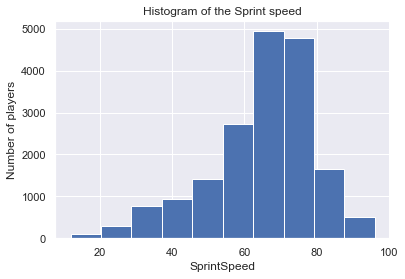

In [11]:
# Look at the distribution of the SprintSpeed
plt.figure()
plt.title("Histogram of the Sprint speed")
plt.xlabel("SprintSpeed")
plt.ylabel("Number of players")
players.SprintSpeed.hist()
plt.show()

We can see that the distribution of the Sprint speed is left skewed. We will then use the median as aggregation to fill the missing values instead of the mean because the median is a robust estimator and then will be less sensitive to the skewness of the distribution.

In [12]:
# Replace NaN with the median
players.SprintSpeed = players.SprintSpeed.fillna(value=players.SprintSpeed.median())

In [13]:
# Check again the missing values
players.isnull().sum()[players.isnull().sum() != 0]

Series([], dtype: int64)

## A3. Building a regression model

By letting them perform exercises, you have gathered data about the following athletic skills (except for the *overall football performance*) of your candidate players:

In [14]:
athletic_skills = ['Overall', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'Jumping', 'Stamina', 'Strength']

To decide which player to hire, you need to know how these skills transfer to football performance.

To predict the football performance of a player, you want to build a linear model with an additional regularization term to prevent overfitting. The specific model used in this exercise is L2-regularized linear regression, aka "Ridge Regression". It combines the least squares linear regression model that you know from the lecture with a penalty on the norm of the weight vector [1]. The function that Ridge Regression minimizes is

$$||y-Xw||_2^2 + \alpha ||w||_2^2,$$

where $y$ is a vector of overall ratings, $X$ is the matrix of data vectors with each *row* being the features of a football player, $w$ is the weight vector, and $\alpha$ is the (non-negative) regularization parameter.

[1] If there are enough model parameters, a powerful machine learning model will be able to "memorize" the value it is supposed to predict for some training examples. That means, it will perform well on those training examples, but will perform much worse on data that was not used for training. One way to counter this is to penalize large weight values. This can be thought of as reducing the complexity of the model.

### A3.1.
Split the data randomly into a train (70%) and a test set (30%). Use 1 as the random seed.

In [15]:
features = players[athletic_skills]
# Using the train_test_split from sklearn
X = features[features.columns[1:]]
y = features['Overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### A3.2.
Build a Ridge Regression model that predicts a player's overall football performance from the other feature in the list above (sklearn might be helpful here).

Ridge Regression has a regularization parameter $\alpha$. Optimize it in the range [0, 2000] via cross validation. Use as a metric the mean squared error. Plot the cross-validation error as a function of the regularization parameter and choose the best parameter for your final model.

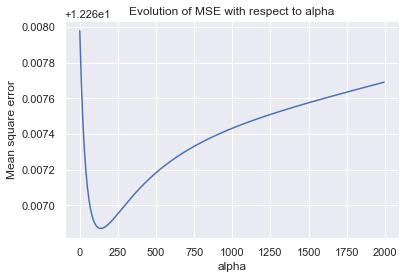

Best alpha : 140 gives MSE of 12.266869659237075


In [16]:
def tune_ridge(X, y, alpha_values=range(0,2000,5)):
    
    param = {'alpha':alpha_values}
    ridge_CV = GridSearchCV(Ridge(), param, cv=10, scoring='neg_mean_squared_error')
    ridge_CV.fit(X,y)

    # Plot the MSE
    plt.figure()
    plt.title("Evolution of MSE with respect to alpha")
    # Plot the MSE (which is the opposite of the score used in the cross validation)
    plt.plot(ridge_CV.cv_results_['param_alpha'], -ridge_CV.cv_results_['mean_test_score'])
    plt.xlabel("alpha")
    plt.ylabel("Mean square error")
    plt.show()
    print("Best alpha :", ridge_CV.best_params_['alpha'], "gives MSE of", -ridge_CV.best_score_)
    return ridge_CV.best_estimator_, ridge_CV.best_params_['alpha'], -ridge_CV.best_score_

best_ridge_model, min_alpha, min_mse = tune_ridge(X_train, y_train)

We took a 10 fold cross validation, a value that has been found through experimentation to generally result in a model skill estimate with low bias a modest variance. With 10, we also make sure that the test set is still big enough. 

In [17]:
# Final model
best_ridge_model.fit(X_train, y_train)
y_pred = best_ridge_model.predict(X_test)

print("Final model has a MSE of : ", mean_squared_error(y_test, y_pred))

Final model has a MSE of :  12.503771065248422


The best alpha takes a very high value, 140 while normally, it takes smaller values

## A4. Feature importance

Hiring new players isn't the only job of a manager/head-coach; another important one is training players. While you are at it, you think, why not use the insights gained from the hiring process to also improve the training process of your entire team? Since a training session can only last a limited amount of time and there are several possible exercises to do, you want to know which athletic skill should your training process focus the most upon. Your idea is to use the *weights* of your regression model as a guidance: In your opinion, a *higher weight* for an athletic skill should mean that this skill is highly *predictive* of the football performance.

### A4.1.
* Print the weights. Why might it *not* be a good idea to use them as they are for gauging a skill's importance?
* How can you fix this?
* What has changed due to your fix?

*Hint: Some skills could get disadvantaged (carefully study the ranges of the corresponding features)! This can be prevented by another preprocessing step discussed in the lecture that takes care of differing ranges, after which you need to train the model again.*

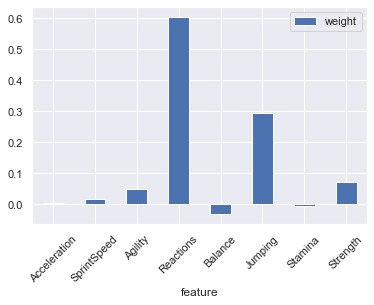

In [21]:
# Plot the weigts
weights = pd.DataFrame({"feature": X.columns, "weight":best_ridge_model.coef_})
weights.plot.bar(x="feature", y="weight", rot=45)
plt.show()

It might not be a good idea to use these weight directly to perform feature importance because we are not sure that our data have the same scale. Features with higher mean will have lower weight since it is a linear combination. Let's plot the distribution of each feature.

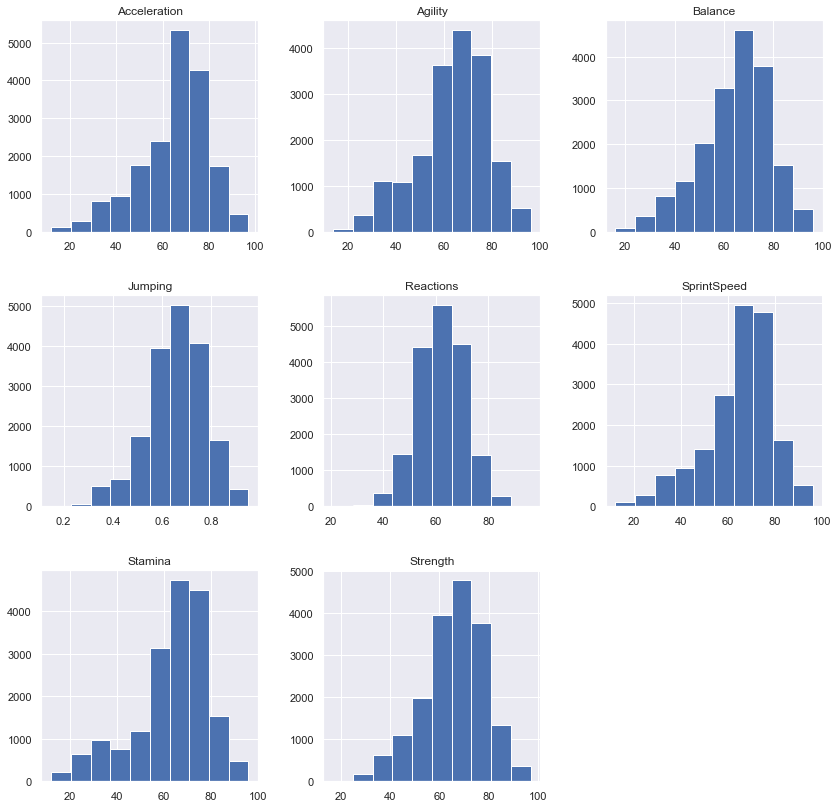

In [23]:
X.hist(figsize=(14,14))
plt.show()

So has can be seen, the jumping feature has a very low mean and the second higher weight which then not signify that the jumping feature is important to predict the overall score !

To avoid this problem we have to scale our data. We will use the minmax scaler from sklearn to do that. The minmax scaler will transform data as :

$$
X_{\text {norm}}= \frac{X-X_{min}}{X_{max}-X_{min}}
$$

We use the minmax scaler and not the standard scaler because our data are a bit left-skewed which would more influence on a min max scaler.

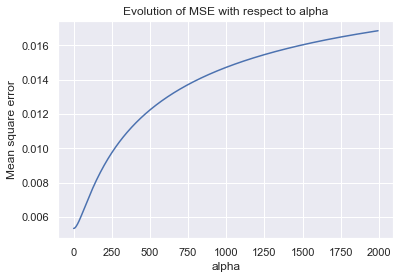

Best alpha : 0 gives MSE of 0.005324643512846254


In [18]:
# Scale the data
X_train_scaled = MinMaxScaler().fit_transform(X_train)
y_train_scaled = MinMaxScaler().fit_transform(y_train.values.reshape((-1,1)))
y_train_scaled = y_train_scaled.reshape(-1)

# Tune alpha
best_scaled_model, min_alpha_scaled, min_mse_scaled = tune_ridge(X_train_scaled, y_train_scaled)

It seems like the best alpha is zero. But one has to remember that we tested alphas by steps of 5, and thus the best alpha might be between 0 and 5.

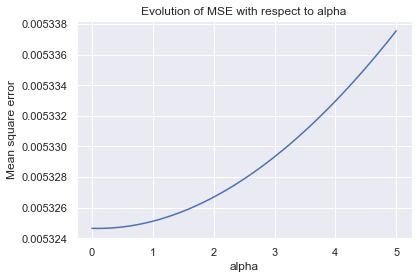

Best alpha : 0.10101010101010101 gives MSE of 0.005324638428655858


In [19]:
# Because the value of alpha is 0 we will restric the search space to [0, 5] and tune the alpha parameter again
best_scaled_model, min_alpha_scaled, min_mse_scaled = tune_ridge(X_train_scaled, y_train_scaled, np.linspace(0,5,100))

As we expected, the best alpha is not zero but is way smaller than 5 which explains our previous result.

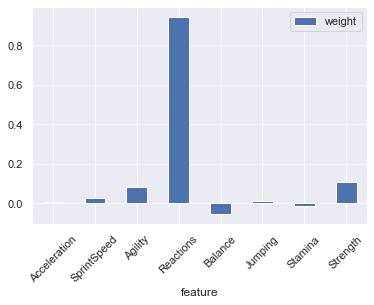

In [20]:
# Train the model using the scaled data
best_scaled_model.fit(X_train_scaled, y_train_scaled)

weights = pd.DataFrame({"feature": X.columns, "weight":best_scaled_model.coef_})
# Plot the weights again
weights.plot.bar(x="feature", y="weight", rot=45)
plt.show()

We can see that the jumping feature, which was the third most important feature, is now one of the last ones. For the other the order remains the same as they had already the same scale before the scaling operation.

Moreover we can see that the optimal value of alpha is now much more lower (0.094 compared to 140 previously)

### A4.2.
* After the *fix* in step A4.1., is everything fine now with the weights? Sort the weights in descending order. Do you observe anything unexpected with the lowest-ranked weights?
* Do you have an idea what could be the potential cause for this? (No need to analytically prove your hypothesis.)
* Come up with a better way to gauge the importance of a feature for the overall performance.

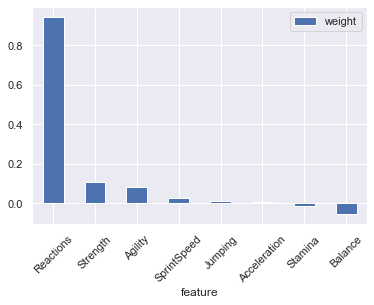

In [21]:
sorted_weights = weights.sort_values(by='weight', ascending=False)
sorted_weights.plot.bar(x="feature", y="weight", rot=45)
plt.show()

The balance feature has a negative weight which means a negative correlation between the balance and the overall score, but it is still more important than the acceleration for example.

One simple way of getting rid of that problem is by getting the absolute value of the weight and then sort these absolute values.

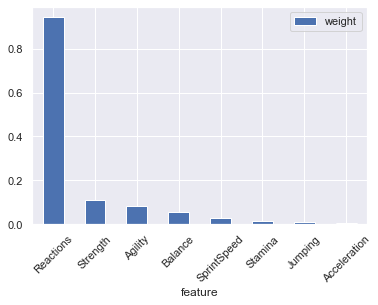

In [22]:
absolute_val_weights = weights
absolute_val_weights.weight = absolute_val_weights.weight.abs()
absolute_val_weights_sorted = weights.sort_values(by='weight', ascending=False)
absolute_val_weights_sorted.plot.bar(x="feature", y="weight", rot=45)
plt.show()

Now balance is the fourth most important feature.

We can see that `reactions` is the most important feature, while the other features have a much lower importance. We do not have exactly the same result as previsouly using the weights.

## A5. Model Improvements

During the ongoing recruiting process, it turns out that attending all the ADA lectures and tutorials has paid off: Solving the ADA homework went like a charm and you are already done with it. Now you wonder whether it is worth going to some football games of the candidates to assess their football-related skills explicitly, and include these skills in training your ML model.

### A5.1. Improving the model
Train a second model, this time also including as features the football-related skills from the list in the step **A2**. Again use cross validation to compute the best hyperparameter in the range [0,2000].

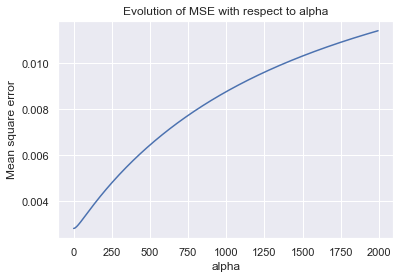

Best alpha : 0 gives MSE of 0.0028124677997639603


In [23]:
# Define a function to split and preprocess data
def split_scaled(X, y, test_size=0.3, random_state=None):
    # Split in training testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # We need to scale the data independantly (test_set cannot be influenced by training_set)
    X_train_scaled = MinMaxScaler().fit_transform(X_train)
    y_train_scaled = MinMaxScaler().fit_transform(y_train.values.reshape(-1,1))
    y_train_scaled = y_train_scaled.reshape(-1)
    X_test_scaled = MinMaxScaler().fit_transform(X_test)
    y_test_scaled = MinMaxScaler().fit_transform(y_test.values.reshape(-1,1))
    y_test_scaled = y_test_scaled.reshape(-1)
    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled

# Split the player dataset in feature and target
X_all = players[players.columns[1:]]
y_all = players['Overall']

X_train_scaled_all, X_test_scaled_all, y_train_scaled_all, y_test_scaled_all = split_scaled(X_all, y_all, random_state=1)

best_ridge_model_all, min_alpha_all, min_mse_all = tune_ridge(X_train_scaled_all, y_train_scaled_all)

It seems we have the same phenomenon as in part A4.1

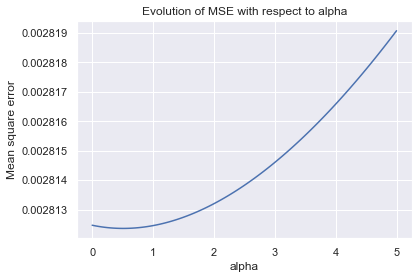

Best alpha : 0.5050505050505051 gives MSE of 0.002812359500007636


In [24]:
# Because the value of alpha is 0 we will restric the search space to [0, 5] and tune the hyperparameter again
best_ridge_model_all, min_alpha_all, min_mse_all = tune_ridge(X_train_scaled_all, y_train_scaled_all, np.linspace(0,5,100))

Indeed, the best alpha is contained in the interval [0 ; 5] and is much smaller than 5. 

In [25]:
# Final model
best_ridge_model_all.fit(X_train_scaled_all, y_train_scaled_all)
y_pred_scaled_all = best_ridge_model_all.predict(X_test_scaled_all)

print("Final model has a MSE of : ", mean_squared_error(y_test_scaled_all, y_pred_scaled_all))

Final model has a MSE of :  0.003809251807822842


### A5.2. Assessing the improvement
Compute *bootstrap confidence intervals* for the mean squared error that the two models (trained in the steps **A3** and **A5.1**) make. Retrain both models *1000 times*, each time with a different random train/test split, and compute the respective mean squared errors.   
*Note: Use the 'optimal regularization parameters' already found via cross validation in steps **A3** and **A5.1**.*

* Find the *two-sided 95% confidence intervals* via bootstrap resampling and plot the mean error together with the confidence interval in a bar plot.
* What can you say about the properties of the models based on the confidence intervals?
* Do you have sufficient evidence to claim that one model is clearly better than the other? Clearly explain your observations!

Mean MSE using only athletic features : 0.00714545, 95% confidence interval : [0.00714057, 0.00715033]
Mean MSE using all features : 0.00382148, 95% confidence interval : [0.00381776, 0.0038252]


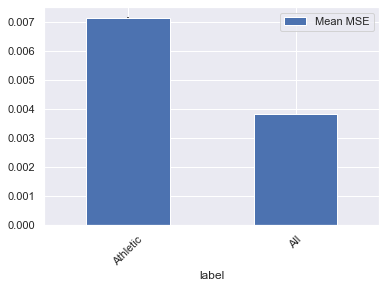

In [26]:
mse = []
mse_all = []

X_train, X_test, y_train, y_test = split_scaled(X, y, random_state=1)
X_train_all, X_test_all, y_train_all, y_test_all = split_scaled(X_all, y_all, random_state=1)

for i in range(1000):
    
    # Bootstrap resamplig 
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train)
    
    # Train the model
    best_ridge_scaled_model = Ridge(alpha = min_alpha_scaled)
    best_ridge_scaled_model.fit(X_train_bootstrap, y_train_bootstrap)
    # Test the model
    y_pred = best_ridge_scaled_model.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

    # Data set using all features
    
    # Bootstrap resamplig 
    X_train_bootstrap_all, y_train_bootstrap_all = resample(X_train_all, y_train_all)
    
    # Train the model
    best_ridge_model_all = Ridge(alpha = min_alpha_all)
    best_ridge_model_all.fit(X_train_bootstrap_all, y_train_bootstrap_all)
    # Test the model
    y_pred_all = best_ridge_model_all.predict(X_test_all)
    mse_all.append(mean_squared_error(y_test_all, y_pred_all))
    
# Compute the confidence bound interval
lower, upper = sms.DescrStatsW(mse).tconfint_mean()
mean = np.mean(mse)
print("Mean MSE using only athletic features : {:.6}, 95% confidence interval : [{:.6}, {:.6}]".format(mean, lower, upper))

# Compute the confidence bound interval
lower_all, upper_all = sms.DescrStatsW(mse_all).tconfint_mean()
mean_all = np.mean(mse_all)
print("Mean MSE using all features : {:.6}, 95% confidence interval : [{:.6}, {:.6}]".format(mean_all, lower_all, upper_all))

means = pd.DataFrame({"label":['Athletic', 'All'], "Mean MSE": [mean, mean_all]})
means.plot.bar(x="label", y="Mean MSE", rot=45, yerr=[upper-lower, upper_all-lower_all])
plt.show()

We can see that the two confidence intervals are tight (the confidence intervals are barely distinguishable in the bar plot). It means that our model has a very low variance because the MSE are close to each others.

We can clearly claim that using all the features can greatly improve the model by reducing at least the mean square error by 0.00334 (difference between the lower bound of the worst model and the upperbound of the best model). We obtain a better model because we use more data and more football specific data (like `LongShots`, `Penalties`,...).

# Task B: Scaling up

## Description

[Reddit](https://www.reddit.com/) aka *'the front page of the internet'* is a network of over a million *communities* aka *'subreddits'*, each of which covers a different topic based on people's interests. In other words, it is a *massive* collection of forums (corresponding to the aforementioned communities), where people can share content specific to a given topic or comment on other people’s posts.   

You are reddit's community manager and want to *appoint new moderators*. Because moderating a specific subreddit isn't a full-time job, you want the chosen moderators to moderate multiple subreddits at the same time. To make this choice effective, the moderators shouldn't have to spend too much time getting to know the community and the prevalent communication style, so it makes sense to let moderators moderate subreddits that are similar in communication style and language. At the same time, it also makes sense to let them moderate subreddits that are similar with respect to the participating users, because this allows moderators to track the behavior of individual users over multiple subreddits. For example, some users might only post offensive content once a month on a given subreddit, and therefore fly under the radar with someone moderating only that subreddit. However, considering all the subreddits these users post to, they might post something offensive every day but on different subreddits. Thus, a moderator in charge of all these subreddits would be able to ban such users much more effectively. In the light of the above description, your task is to find out ways to choose moderators considering both the textual content and the users of a subreddit.

### Dataset:
The dataset provided to you includes all the posts of the 15 largest subreddits written as of May 2015.

Reddit posts (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/19SVHKbUTUPtC9HMmADJcAAIY1Xjq6WFv/view?usp=sharing))
```
reddit_posts
 |-- id: id of the post 
 |-- author: user name of the author 
 |-- body: text of the message
 |-- subreddit: name of the subreddit
```

Reddit scores (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/1vr4PolJzTXr6ODSe3ucib5EAyp3rjxec/view?usp=sharing))
```
reddit_scores
 |-- id: id of the post 
 |-- score: score computed as sum of UP/DOWN votes
```

*Note: Jaccard similarity between subreddits represented using either the set of top-1000 words or the set of users can be computed locally (on the driver), however, all the other tasks have to be implemented in Spark.*

## B1. Getting a sense of the data

Start a PySpark instance...

In [27]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
                                   ('spark.executor.memory', '12g'),  # find
                                   ('spark.driver.memory','4g'), # your
                                   ('spark.driver.maxResultSize', '2G') # setup
                                  ])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

... and load the data in a Spark dataframe.

In [3]:
messages = spark.read.json('./data/messages.json')
score = spark.read.json('./data/score.json')

In [4]:
messages.printSchema()
score.printSchema()

root
 |-- author: string (nullable = true)
 |-- body: string (nullable = true)
 |-- id: string (nullable = true)
 |-- subreddit: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- score: long (nullable = true)



### B1.1. Identify the most active subreddit

Print the list of subreddits along with the following information:
1. The total number of posts
2. The number of users with at least 1 message
3. The mean message length

*Note: Keep everything in one single dataframe and print the list sorted by number of posts in descending order.*

In [5]:
messages.registerTempTable("messages")

query = """
SELECT subreddit, count(*) as posts, COUNT (DISTINCT author) as authors, AVG(LENGTH(body)) as average_length
FROM messages
GROUP BY subreddit
ORDER BY posts DESC
"""

reddit_stats = spark.sql(query)
reddit_stats.cache()
reddit_stats.show()

+---------------+-------+-------+------------------+
|      subreddit|  posts|authors|    average_length|
+---------------+-------+-------+------------------+
|leagueoflegends|1151287| 119321|152.72280760574904|
|            nba| 704862|  45034|106.48656758344187|
|          funny| 691139| 224077|106.82283882113438|
|           pics| 564502| 205305| 114.9710045314277|
|            nfl| 534345|  41593|148.96989211090212|
|         videos| 511492| 157628|170.22702603364274|
|           news| 477658|  98736| 230.9491602778557|
| DestinyTheGame| 471160|  37008|165.41786866457255|
|         soccer| 455215|  41648|134.42224663071295|
|          DotA2| 445154|  41466|141.48906670500546|
|      worldnews| 439417|  99261|224.93754679495785|
|  AdviceAnimals| 411902| 115815| 159.2513801826648|
|         hockey| 389329|  25568| 95.37287230080472|
|GlobalOffensive| 382017|  46686| 147.2883981602913|
|         movies| 354601|  92484|164.83209297210104|
+---------------+-------+-------+-------------

### B1.2. Identify the largest subreddit

Print *two* different lists of subreddits: ordered by (1) the number of posts, and (2) the number of users. For each subreddit, print the name and the corresponding counts.

Additionally, (3) plot the mean of message length for each subreddit in descending order. Visualise the statistical significance by plotting the 99% confidence intervals for each subreddit as well.

In [6]:
messages_count = reddit_stats.select("subreddit", "posts").sort(desc("posts"))
messages_count.show()

authors_count = reddit_stats.select("subreddit", "authors").sort(desc("authors"))
authors_count.show()

+---------------+-------+
|      subreddit|  posts|
+---------------+-------+
|leagueoflegends|1151287|
|            nba| 704862|
|          funny| 691139|
|           pics| 564502|
|            nfl| 534345|
|         videos| 511492|
|           news| 477658|
| DestinyTheGame| 471160|
|         soccer| 455215|
|          DotA2| 445154|
|      worldnews| 439417|
|  AdviceAnimals| 411902|
|         hockey| 389329|
|GlobalOffensive| 382017|
|         movies| 354601|
+---------------+-------+

+---------------+-------+
|      subreddit|authors|
+---------------+-------+
|          funny| 224077|
|           pics| 205305|
|         videos| 157628|
|leagueoflegends| 119321|
|  AdviceAnimals| 115815|
|      worldnews|  99261|
|           news|  98736|
|         movies|  92484|
|GlobalOffensive|  46686|
|            nba|  45034|
|         soccer|  41648|
|            nfl|  41593|
|          DotA2|  41466|
| DestinyTheGame|  37008|
|         hockey|  25568|
+---------------+-------+



We can see that the groups differ for amount of posts and authors. This follows our intuition, as a group like `leagueoflegends` will have a smaller community than `funny` (less authors) but each author will post on average more messages.

As the data is too big to manually calculate the confidence intervals, we need to find another method to visualize the 99% interval. For this, we will assume the average length of posts has a normal distribution. The following formula is used: 
$\bar{x} \pm z \frac{s}{\sqrt{n}}$

Where $\bar{x}$ is the mean, z is the Z-value obtained from a Z-table, s is the standard deviation and n is the number of posts

In [102]:
# Calculate standard deviation for every subreddit
posts_stddev = messages.groupBy("subreddit").agg(stddev(length("body")).alias("stddev_length"))
# Group stddev with previous calculate stats, drop unnecessary columns and create dataframe
posts_stats = reddit_stats.join(posts_stddev, "subreddit").drop("authors").sort(desc("average_length")).toPandas()
posts_stats

,subreddit,posts,average_length,stddev_length
0,news,477658,230.949160,334.516180
1,worldnews,439417,224.937547,355.402419
2,videos,511492,170.227026,290.461162
3,DestinyTheGame,471160,165.417869,225.444718
4,movies,354601,164.832093,255.503286
5,AdviceAnimals,411902,159.251380,238.983449
6,leagueoflegends,1151287,152.722808,256.314799
7,nfl,534345,148.969892,237.641786
8,GlobalOffensive,382017,147.288398,229.592384
9,DotA2,445154,141.489067,258.451712


In [99]:
# We first look up the z value for the 99%-confidence interval from the z-table
z = 2.576
# Then we use the formula given above
posts_stats['confidence_interval'] = z*posts_stats['stddev_length']/np.sqrt(posts_stats['posts'])

<function matplotlib.pyplot.show(*args, **kw)>

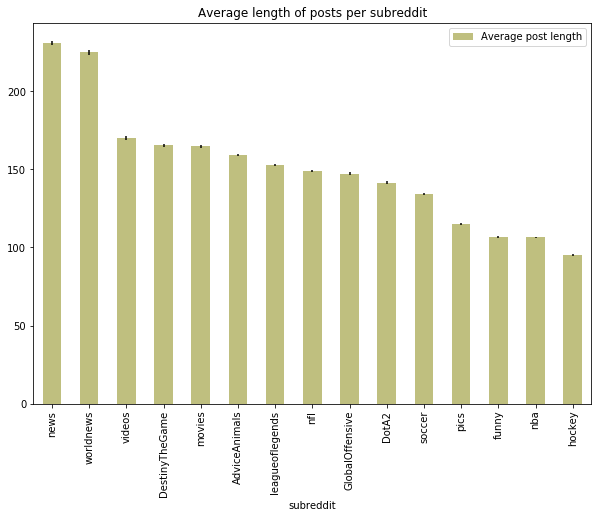

In [100]:
ax = posts_stats.plot(kind="bar", 
                            x="subreddit", y="average_length", 
                            figsize=(10, 7), label="Average post length", alpha=0.5, color="olive", title="Average length of posts per subreddit",
                            yerr=posts_stats['confidence_interval'].to_numpy())
plt.show

The confidence intervals are very narrow. This makes sence, as the number of posts is much larger than the mean of the length of the posts. 

### B1.3. Identify the subreddit with the highest average score

Print the list of subreddits sorted by their average content scores.

In [263]:
post_score = messages.join(score, messages.id == score.id)
post_score_avg = post_score.select("subreddit", "score").groupBy("subreddit").agg(round(avg("score"),2).alias("average_score")).sort(desc("average_score"))
post_score_avg.show()

+---------------+-------------+
|      subreddit|average_score|
+---------------+-------------+
|         videos|        12.65|
|           pics|        12.22|
|          funny|        12.04|
|  AdviceAnimals|        11.25|
|         soccer|        10.63|
|         movies|         9.82|
|            nfl|         9.05|
|            nba|         9.03|
|           news|         8.67|
|      worldnews|         7.87|
|         hockey|         6.52|
|leagueoflegends|         5.98|
|          DotA2|         4.88|
|GlobalOffensive|         4.35|
| DestinyTheGame|         3.03|
+---------------+-------------+



We can see that the video game messages have on average lower score than more generic subreddits.

## B2. Moderator assignment based on Subreddit Textual Content

Different subreddits follow different communication styles inherent in the topic and the community. Having said that, the goal is to discover similar subreddits by only looking at the *words* present in the posted messages. Once such a list of similar subreddits is identified, an appropriately chosen moderator can then be assigned to all these subreddits.

Specifically, the task boils down to computing a similarity score between two subreddits based on the *words* present in their textual content. Your first idea is to use the *Jaccard similarity*, which is defined as the size of the intersection of two sets divided by the size of their union.

$Jaccard(A,B) = \frac{|A \cap B|}{|A \cup B|}$

In [104]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

### B2.1.
The first step requires constructing a set representation of each subreddit. The goal is to represent each subreddit as a *set of words* existing in the messages posted on that subreddit. Compute the 50,000 most frequent words across all the provided subreddits. Construct a representation for each subreddit by retaining only the words found in the previously identified set of 50,000 frequent words.

Some rules:
 * Words are defined as tokens matching the regular expression `\W`
 * Remove all the stop-words (English language)

*Note: You might find the [RegexTokenizer](https://spark.apache.org/docs/2.2.0/ml-features.html#tokenizer) and the [StopWordsRemover](https://spark.apache.org/docs/2.2.0/ml-features.html#stopwordsremover) utilities available in the package pyspark.ml useful for this task as they help you in transforming the features and removing stopwords.*

In [105]:
from pyspark.ml.feature import StopWordsRemover, RegexTokenizer
from pyspark.sql.functions import col, udf, rank
from pyspark.sql.types import IntegerType
from pyspark.sql.window import Window

In [106]:
# We need only the subreddit and the body of the comments
messages_body = messages.select("subreddit", "body")

# Tokenize comments
regexTokenizer = RegexTokenizer(inputCol="body", outputCol="words", pattern="\\W")
messages_transformed = regexTokenizer.transform(messages_body)

# Remove stopwords
remover = StopWordsRemover(inputCol="words", outputCol="words_filtered")
messages_filtered = remover.transform(messages_transformed)

# Explode the list of words, in order to count all word occurences
all_words = messages_filtered.select(["subreddit", "words_filtered"]).withColumn("words_filtered", explode("words_filtered"))

# Count occurences of all words and take 50 000 most frequent ones
word_counts = all_words.groupby("words_filtered").agg(count("*").alias("word_count")).sort(desc("word_count")).limit(50000)

In [107]:
# Now we join all the words with the top words. An inner join is needed, to drop all the words not represented in the top 50 000
top_words = all_words.join(word_counts, "words_filtered", how="inner").dropDuplicates().sort(desc("word_count"))

# Now we put all words in a list per subreddit
top_words_list = top_words.groupBy("subreddit").agg(collect_set("words_filtered").alias("word_set")).toPandas()
top_words_list

,subreddit,word_set
0,hockey,"[swamps, thorne, deteriorated, github, literal..."
1,videos,"[swamps, thorne, deteriorated, github, literal..."
2,DotA2,"[swamps, thorne, deteriorated, github, literal..."
3,news,"[swamps, deteriorated, github, literal, portra..."
4,AdviceAnimals,"[swamps, thorne, deteriorated, github, literal..."
5,DestinyTheGame,"[swamps, thorne, deteriorated, github, literal..."
6,pics,"[swamps, thorne, deteriorated, github, literal..."
7,worldnews,"[swamps, thorne, deteriorated, github, literal..."
8,nfl,"[swamps, deteriorated, github, literal, portra..."
9,soccer,"[swamps, thorne, deteriorated, github, literal..."


### B2.2.
* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B2.1.**, and plot in a heatmap the similarity values of all the pairs of subreddits.
* Analyze this plot and discuss your observations. Do you observe that subreddits corresponding to similar topics possess higher Jaccard similarity?
* Provide detailed interpretations of the obtained results. Specifically,
    - Explain the limitations of your conclusions, and discuss the potential reasons.
    - Explain the potential problems with the Jaccard similarity function.

In [232]:
def create_heatmap(frame, column):
    """
    Create a heatmap from a pandas MxN DataFrame
    Takes as input the frame (DataFrame) and column (string).
    Returns a symmetric DataFrame where (i,j) represents the similarity between subreddit i and subreddit j
    """
    indices = frame['subreddit']
    heatmap = pd.DataFrame(index=indices, columns=indices)
    for i in range(frame.shape[0]):
        for j in range(i, frame.shape[0]):
            heatmap.loc[indices[i],indices[j]] = np.round(jaccard_similarity(frame.loc[i,column],frame.loc[j,column]),2)
            heatmap.loc[indices[j],indices[i]] = heatmap.loc[indices[i],indices[j]]
    return heatmap.apply(pd.to_numeric)

In [255]:
def plot_heatmap(heatmap):
    fig, ax = plt.subplots()
    fig.set_size_inches(12,10)

    ax = sns.heatmap(heatmap,annot=True)

    # Bugfix to show whole first and last row
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.show()

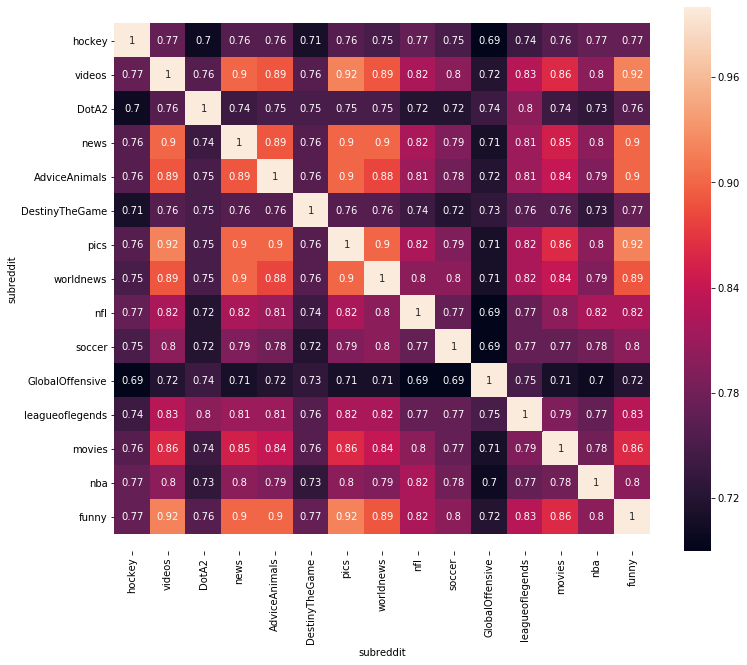

In [256]:
heatmap = create_heatmap(top_words_list, "word_set")
plot_heatmap(heatmap)

From this heatmap we can identify similar and unsimilar groups:

- The gaming subreddits are the least similar to other subreddits. This is probably caused by the high amount of game-specific terms (terms which are not necessarily in the 50000 most frequently used). Even the similarity between gaming subreddits is low.
- General subreddits like 'pics', 'videos', 'news',... are highly similar, because of the mostly general words that are used. Indeed the higher similarities are obtained between `video`, `pics` and `funny` (0.92) which are all general subreddits.
- Sport subreddits (e.g. 'hockey' and 'soccer') are not especially similar but they are more similar than gaming subreddits.

The Jaccard similarity has a major drawback, it does not take into account the number of time the word is present in the subreddit. For example, if the word `game` is present 1000 times in the subreddits `leagueOflegend` and `DotA2`, it will have the same effect on the jaccard similarity between `leagueOflegend` and `DotA2` and on the jaccard similarity between `leagueOflegend` and `funny` even if the word `game` is only present once the latter subreddits.

### B2.3.

* Alternatively, compute the 1000 most frequent words for each subreddit, construct its representation as the set of top-1000 words, and print a heatmap with the Jaccard similarity like in step **B2.2.**.
* Explain your observations in detail: how and why is this new result different from the one obtained in **B2.2.**?

*Note: Use the same rules specified in B2.1: words tokenized with the regex \W and stop-words removed*

In [114]:
# Group all words by subreddit and count occurence
all_words_grouped = all_words.groupby(["words_filtered","subreddit"]).agg(count("*").alias("word_count")).sort(desc("word_count"))

In [115]:
# Select the first 1000 words of every subreddit
window = Window.partitionBy(all_words_grouped['subreddit']).orderBy(all_words_grouped['word_count'].desc())
top_words_grouped = all_words_grouped.select('*', row_number().over(window).alias('row_number')).filter(col('row_number') <= 1000)

In [251]:
# Check if we have indeed 15 000 words (15 times 1000)
top_words_grouped.count()

15000

In [116]:
# Put all words in list per subreddit
top_words_grouped_list = top_words_grouped.groupBy("subreddit").agg(collect_set("words_filtered").alias("words")).toPandas()

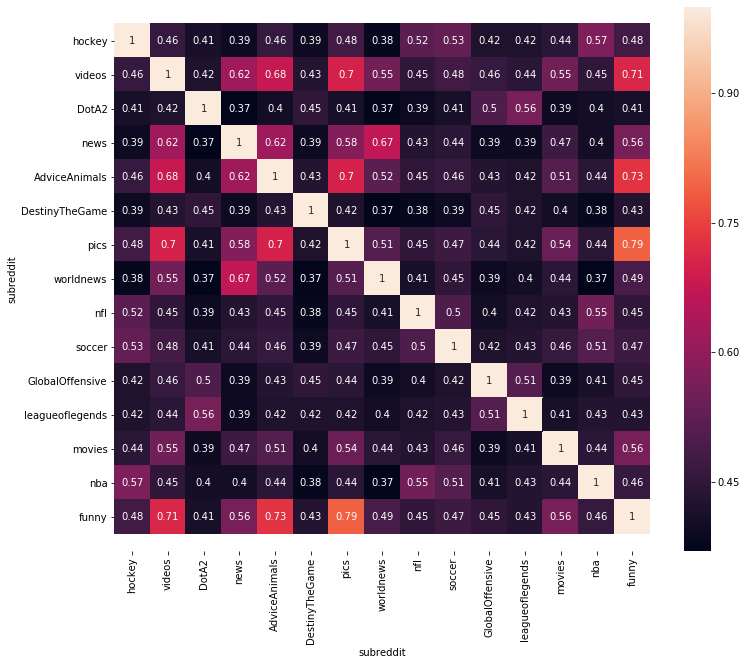

In [257]:
heatmap_language = create_heatmap(top_words_grouped_list, "words")
plot_heatmap(heatmap_language)

As expected, the similarity here is lower than in section B2.2, because the 1000 words are calculated per subreddit, resulting in more subreddit specific terms.

## B3. Moderator assignment based on Subreddit Users

Subreddits can be seen as communities of people interacting about a common topic. As an alternative to the *textual content* based similarity in **B2**, your task here is to validate if similarity between two subreddits can be measured based on their participating users.

Of course users are not monothematic, and they interact with multiple subreddits. In this task, we are specifically interested in observing the amount of overlap across different subreddits based on their participating users. Similar to **B2**, the overlap is measured using the *Jaccard similarity*.


### B3.1.
Construct a set representation of each subreddit as the users that posted at least one time in that subreddit.

Some users are very talkative and active across different topics. Print the username of the person that posted in the maximum number of subreddits. *Note that users who posted at least once in a subreddit are considered as participant of that subreddit.*

In [119]:
# Select all different authors per subreddit
subreddit_authors = messages.select("subreddit", "author").distinct()
# Put the different authors per subreddit in a list
subreddit_authors_set = subreddit_authors.groupBy("subreddit").agg(collect_set("author").alias("authors")).toPandas()

In [120]:
most_active = subreddit_authors.groupBy("author").count().sort(desc("count"))
most_active.first()

Row(author='whispen', count=15)

`whispen` posted in all subreddits considered here.

### B3.2.

* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B3.1.**, and visualise it similar to **B2**.
* Analyze this plot, identify highly similar pairs of subreddits, and clearly describe your observations.

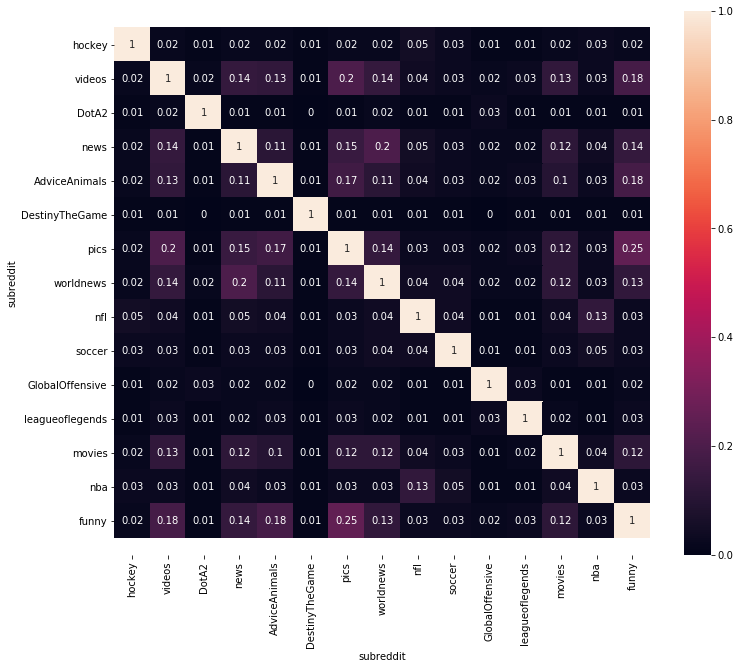

In [258]:
heatmap_users = create_heatmap(subreddit_authors_set, "authors")
plot_heatmap(heatmap_users)

The user similarity is drastically lower than the language similarity.

In general we can see that people posting in general subreddit like `funny`, `AdviceAnimal`, `movies`, `news`, `pics`, `video`, `worldnews` are more prone to post on other general subreddits while people posting on specific subreddits like video games and sport keep publishing in their own subreddit (except for `nba` and `nfl` which seem to have some common authors)

## B4. Language vs. Users similarity
    
* Visualize the similarity scores based on word (**B2.3.**) and user (**B3**) similarity on the x and y axes respectively for the subreddit `NBA` compared to all the other subreddits. Do some semantically meaningful groups emerge? Provide clear explanataions of your observations.
* Furthermore, do you observe differences in similarities between various sports-related subreddits in the dataset? Please provide explanations of the reasons behind these differences, if any!

In [259]:
similarities = pd.DataFrame()
similarities['language'] = heatmap_language['nba'].drop('nba')
similarities['user'] = heatmap_users['nba'].drop('nba')

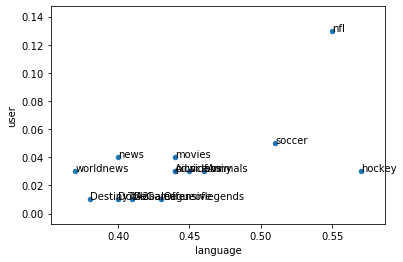

In [260]:
fig, ax = plt.subplots()
similarities.plot.scatter('language', 'user', ax=ax)

for k, v in similarities.iterrows():
    ax.annotate(k, v)

We can see following groups emerge:

- News : news, worldnews
- Video Game : DestinyTheGame, DotA2, GlobalOffensive, leagueoflegend
- General topic : movies, video, AdviceAnimals, pics, funnny
- Sports : soccer, nfl, hockey

From this, we conclude that it is not necessarily required to compute the Jaccard Similarity between all subreddits to be able to form groups, the relative similarity between one subreddit and all the others provides already valuable results.

One major difference between both measurements is that language similarity is much higher on average than the user similarity. This is because there are some very common words (e.g. 'like') that are present in all sets because they are very generic. In contrast, there are no "generic" users and very few users are present in all sets.

